# Basic use of the relative feature tightness measure

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [2]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [3]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [4]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [5]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [6]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [7]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [8]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [9]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [10]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.062089
         1         2.883484
         10        4.475035
         100       5.527128
         1000      4.330087
...                     ...
928      990      -1.027469
939      986      -1.027469
959      995      -0.027469
968      990      -3.834824
969      995      -0.027469

[2098013 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [11]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [12]:
df_split_coco = np.array_split(coconut_samples, 10)

In [13]:
df_split_coco[3]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
115890,COc1c(O)c(OC2OC(CO)C(O)C(O)C2O)cc2oc(-c3ccccc3...,446.121297,0.35290,OEZOKUSEUYXERJ-UHFFFAOYSA-N,OEZOKUSEUYXERJ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 121, 202, 222, 314, 333, 389, 489, 501, 5..."
115891,Oc1ccc(C2Oc3cc(O)ccc3C3C(c4cc(O)cc(O)c4)c4c(O)...,470.136553,5.06680,HHCRXJSIODUTQN-UHFFFAOYSA-N,HHCRXJSIODUTQN,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[52, 112, 167, 381, 398, 414, 416, 656, 736, 7..."
115892,C#CC1(O)CCC2C3CCC4=CC(=NOCC(=O)NCCC5(c6ccccc6)...,614.431619,5.07340,ACCZPKBWXZLDOB-UHFFFAOYSA-O,ACCZPKBWXZLDOB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[7, 16, 41, 80, 84, 88, 182, 197, 219, 273, 27..."
115893,COC(=O)c1c(C)[nH]c(-c2ccco2)c1C1C(=O)Nc2ccc(Br...,414.021519,4.21622,ZNNVKKPGGBQDAH-UHFFFAOYSA-N,ZNNVKKPGGBQDAH,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[7, 74, 121, 145, 155, 156, 312, 314, 474, 525..."
115894,CC1CC(O)C2=C(CO)CCCC2C12CC(c1ccoc1)OC2=O,332.162374,2.74370,NQFQJZXPCAHOPD-UHFFFAOYSA-N,NQFQJZXPCAHOPD,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[56, 67, 80, 175, 222, 287, 314, 384, 390, 396..."
...,...,...,...,...,...,...,...,...
154515,C=CC(C)(CCC=C(C)CCC=C(C)C)c1ccc(O)c(Oc2cc(C(C)...,626.433510,12.42890,SRYUFQNDYPIUQF-UHFFFAOYSA-N,SRYUFQNDYPIUQF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[53, 80, 101, 114, 202, 237, 306, 357, 385, 39..."
154516,C=Cc1cc(C(=O)OC)c2c(cnc3ccccc32)c1,263.094629,3.81760,ICHHFDQICLUNRA-UHFFFAOYSA-N,ICHHFDQICLUNRA,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[15, 88, 145, 168, 227, 289, 378, 390, 629, 65..."
154517,CC(C)C1CCC2=CC(=O)CC(C)(O)C2(C)C1,236.177630,3.09900,OJDVMTKOUGIONZ-UHFFFAOYSA-N,OJDVMTKOUGIONZ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 40, 84, 182, 242, 253, 283, 314, 339, 418,..."
154518,COCOC1C=C(C(=O)O)CC(N=NN)C1N,244.117155,-0.58800,VZZHSARKWNEPAY-UHFFFAOYSA-N,VZZHSARKWNEPAY,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 33, 80, 231, 269, 346, 350, 389, 452, 456..."


In [14]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [15]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[3]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
113705,O=C(OC1CCCCC1)[C@@H]1C[C@H]2C=C[C@H]1C2,220.146330,3.07450,MSPIWBYBMMBCEX-GMXVVIOVSA-N,MSPIWBYBMMBCEX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 90, 119, 209, 273, 390, 394, 534, 605, 650..."
113706,COc1ccc(-c2n[nH]c(-c3ccncc3)n2)cc1,252.101111,2.54230,YUVVMHVLGDNDCJ-UHFFFAOYSA-N,YUVVMHVLGDNDCJ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 105, 168, 304, 322, 378, 383, 552, 695, 7..."
113707,Cc1occc1C(=O)N[C@@H]1CC[C@H](C)N(CC#Cc2ccccc2)C1,336.183778,3.22242,PIPJUZHBBSRSMN-QFBILLFUSA-N,PIPJUZHBBSRSMN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[9, 80, 102, 151, 166, 272, 387, 389, 430, 433..."
113708,Cc1cc(=O)oc2cc(NC(=S)Nc3ccc(S(=O)(=O)N4CCCc5cc...,505.112998,5.05182,WBBRZXPCMQXNDT-UHFFFAOYSA-N,WBBRZXPCMQXNDT,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 97, 110, 171, 177, 184, 191, 245, 314, 31..."
113709,CC(C)(C)c1ccc(C(=O)Nc2nnc(CCS(=O)(=O)c3ccc(Br)...,507.028596,4.86680,YYLSEVJAVCFKFN-UHFFFAOYSA-N,YYLSEVJAVCFKFN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[33, 80, 114, 162, 245, 251, 291, 319, 350, 37..."
...,...,...,...,...,...,...,...,...
151601,Cc1cccn2c(=O)c(/C=C3\SC(=S)N(CCCCCC(=O)O)C3=O)...,515.166096,2.60092,FQFWJFLZVAUUFY-SDXDJHTJSA-N,FQFWJFLZVAUUFY,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 67, 80, 88, 95, 97, 130, 207, 215, 273, 2..."
151602,CCn1c(=O)c(=O)n(CC(=O)N2CCC(CCc3ccc(C)cc3)CC2)...,540.240641,2.61322,LWNKCBHUPPDNLH-UHFFFAOYSA-N,LWNKCBHUPPDNLH,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[29, 34, 45, 80, 112, 114, 235, 286, 294, 310,..."
151603,Cc1nc2c(s1)[C@@H](N(C)C(=O)COC[C@@H]1CCCO1)CCC2,324.150764,2.48292,LHOOQSOAISSWDC-JSGCOSHPSA-N,LHOOQSOAISSWDC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 159, 162, 248, 361, 378, 461, 473, 490, 5..."
151604,CCc1ccc(N(CCCC(=O)N(Cc2ccccc2Cl)[C@@H](C)C(=O)...,535.227155,4.78060,BZUBLMIWWTYDBN-RTWAWAEBSA-N,BZUBLMIWWTYDBN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 66, 80, 81, 117, 132, 145, 158, 238, 283, ..."


In [16]:
joint_samples = pd.concat((df_split_coco[3], df_split_zinc[3]), ignore_index=True)

In [17]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_10701/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [18]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

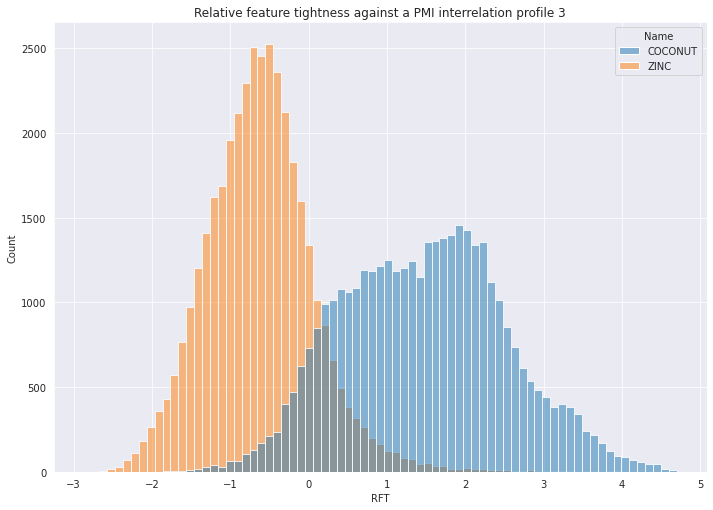

In [19]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 3')
plt.savefig(f"../images//joint_samples_RFT3.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC curve

In [20]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

<Figure size 432x288 with 0 Axes>

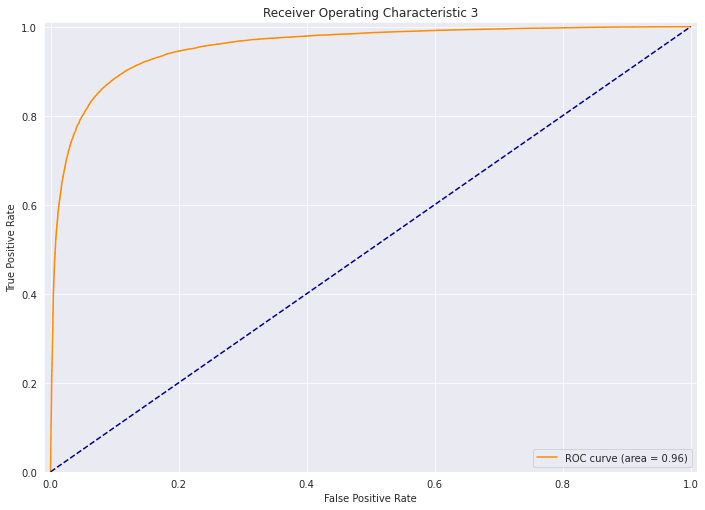

In [21]:
from matplotlib.pyplot import figure
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 3')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC3.svg", format="svg")
plt.show()